In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../src')

## 3. Modeling - Logistic Classification

### 3.1 Load and Explore Dataset

**[3.1.1]** Import the pandas, numpy, and dump package

In [3]:
import pandas as pd
import numpy as np
from joblib import dump

In [4]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

In [5]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### 3.2 Logistic Classification

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Fit the model before hyperparameter tuning.

In [9]:
adaboost_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [12]:
adaboost_clf.fit(X_train, y_train)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [10]:
from models.predict_model import predict_model

                roc-auc score
Training Set         0.999958
Validation Set       0.999909


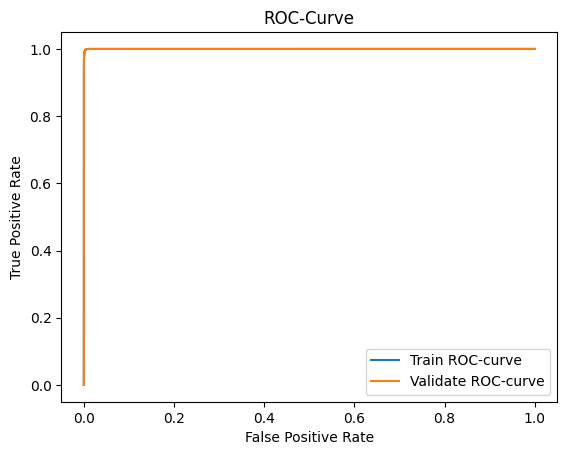

In [13]:
predict_model(adaboost_clf, X_train, X_val, y_train, y_val)

In [14]:
from visualization.submission_file import submission_file

In [16]:
y_test_probs = adaboost_clf.predict_proba(X_test)[:, 1]

In [17]:
submission_7 = submission_file(y_test_probs)

In [27]:
submission_7.to_csv('../data/submission/submission_7_adaboost.csv', index=False)

In [25]:
submission_7[submission_7['drafted'] == 0.5]

,player_id,drafted
434,7fb2e746-dcab-472a-b5e8-573abc7c2cb0,0.5
726,d26a4411-2b00-4511-adaa-996b0b8bf577,0.5
793,66861bba-ac18-4a3f-83a3-737c69e54aad,0.5
988,02784a74-c446-4c3d-b9eb-4e17972abe90,0.5
1041,a163ccbf-7809-4187-bcb0-5e6a0d9b702e,0.5
1108,c436c555-a9cc-42b5-86a9-4488920be840,0.5
1120,db33833e-d339-4a66-b7b4-138a3f127294,0.5
1135,8dda8f0e-413f-4d3f-b4d4-9bdb26fe432d,0.5
1183,ab346efc-fcd1-4e8b-badf-a6c61aa4256a,0.5
1185,4e2e85e4-a15a-424a-a890-9685c4537792,0.5


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3],
}

In [30]:
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [31]:
random_search = RandomizedSearchCV(
    adaboost_clf,
    param_distributions=param_dist,
    n_iter=10, 
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42,
)

In [32]:
random_search.fit(X_train, y_train)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': [1, 2, 3],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42, scoring='roc_auc')

In [33]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

In [34]:
best_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=best_params['base_estimator__max_depth']),
                                   n_estimators=best_params['n_estimators'],
                                   learning_rate=best_params['learning_rate'])

In [35]:
best_adaboost.fit(X_train, y_train)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=60)

                roc-auc score
Training Set         0.999999
Validation Set       0.999776


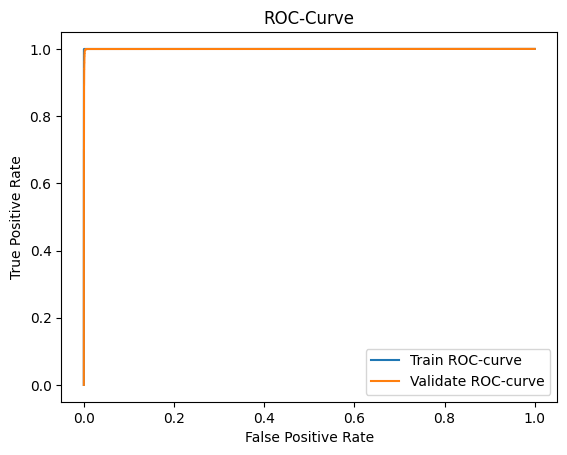

In [36]:
predict_model(best_adaboost, X_train, X_val, y_train, y_val)

In [37]:
y_test_probs = best_adaboost.predict_proba(X_test)[:, 1]

In [38]:
submission_8 = submission_file(y_test_probs)

In [ ]:
submission_8.to_csv('../data/submission/submission_8_best_adaboost.csv', index=False)

#### Hyperparameter Tuning with C

Smaller values specify stronger regularization

default = 1

In [135]:
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [136]:
train_score = []
val_score = []
    
for i in c:
    log = LogisticRegression(random_state=8, max_iter=2000, C=i).fit(X_train, y_train)
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]
        
    train_score.append(roc_auc_score(y_train, y_train_probs))
    val_score.append(roc_auc_score(y_val, y_val_probs))       
    
score = pd.DataFrame({'train_score': train_score,
                         'val_score': val_score}, index=c)
print(score)

          train_score  val_score
0.001        0.992993   0.993133
0.010        0.997817   0.997847
0.100        0.999560   0.999503
1.000        0.999824   0.999788
10.000       0.999860   0.999822
100.000      0.999866   0.999827
1000.000     0.999868   0.999829


#### Hyperparameter Tuning with Solver

default = lgfgs

In [130]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [138]:
train_score = []
val_score = []
C = 1000
max_iter = 2000
    
for i in solver:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=i).fit(X_train, y_train)
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]
        
    train_score.append(roc_auc_score(y_train, y_train_probs))
    val_score.append(roc_auc_score(y_val, y_val_probs))       
    
score = pd.DataFrame({'train_score': train_score,
                         'val_score': val_score}, index=solver)
print(score)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                 train_score  val_score
lbfgs               0.999868   0.999829
liblinear           0.999865   0.999825
newton-cg           0.999868   0.999829
newton-cholesky     0.999867   0.999829
sag                 0.999296   0.999206
saga                0.998724   0.998650


#### Hyperparameter Tuning with Penalty

Penalties support by solver were 'l2', and 'none'

default = l2

In [143]:
penalty = ['l2', 'none']

In [144]:
train_score = []
val_score = []
C = 1000
max_iter = 2000
solver = 'lbfgs'
    
for i in penalty:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=solver, penalty=i).fit(X_train, y_train)
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]
        
    train_score.append(roc_auc_score(y_train, y_train_probs))
    val_score.append(roc_auc_score(y_val, y_val_probs))       
    
score = pd.DataFrame({'train_score': train_score,
                         'val_score': val_score}, index=penalty)
print(score)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


      train_score  val_score
l2       0.999868   0.999829
none     0.999868   0.999830


#### Hyperparameter Tuning with Multi-Class Handling

default = auto

In [145]:
multi_class = ['auto', 'ovr', 'multinomial']

In [146]:
train_score = []
val_score = []
C = 1000
max_iter = 2000
solver = 'lbfgs'
penalty = 'none'
    
for i in multi_class:
    log = LogisticRegression(random_state=8, max_iter=max_iter, C=C, solver=solver, penalty=penalty, multi_class=i).fit(X_train, y_train)
    y_train_probs = log.predict_proba(X_train)[:, 1]
    y_val_probs = log.predict_proba(X_val)[:, 1]
        
    train_score.append(roc_auc_score(y_train, y_train_probs))
    val_score.append(roc_auc_score(y_val, y_val_probs))       
    
score = pd.DataFrame({'train_score': train_score,
                         'val_score': val_score}, index=multi_class)
print(score)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:118

             train_score  val_score
auto            0.999868    0.99983
ovr             0.999868    0.99983
multinomial     0.999868    0.99983


### Model after hyperparameter tuning

In [182]:
log_reg_tune = LogisticRegression(random_state=8, max_iter=2000, solver='lbfgs', penalty='none', multi_class='auto')
log_reg_tune.fit(X_train, y_train)

/Users/narongvatchingpayakmon/Projects/adv_mla_2023/adv_mla_2023_at1_14229898/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=2000, penalty='none', random_state=8)

In [187]:
dump(log_reg_tune, '../models/log_reg_tune.joblib')

['../models/log_reg_tune.joblib']

                roc-auc score
Training Set         0.999868
Validation Set       0.999830


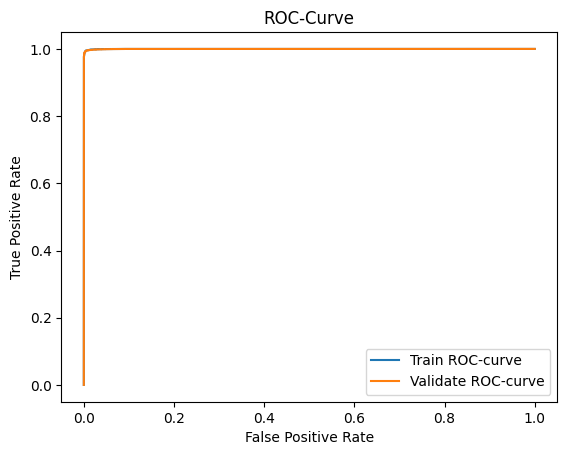

In [188]:
logit(log_reg_tune)

In [190]:
y_test_probs_2 = log_reg_tune.predict_proba(X_test)[:, 1]

In [191]:
submission_2 = submission_file(y_test_probs_2)

In [192]:
submission_2

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.0
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.0
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.0
3,32402798-471c-4a54-8cb4-29cd95199014,0.0
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.0
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.0
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.0
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.0
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.0


In [193]:
submission_2.to_csv('../data/submission/submission_2.csv', index=False)